# NLP - US Airline Twitter Sentiment Project

##### Elige Grant
##### July 2021

## Background and Context
Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

## Objective
To implement the techniques learned as a part of the course.

 * Basic understanding of text pre-processing.
 * What to do after text pre-processing
 * Bag of words
 * Tf-idf
 * Build the classification model.
 * Evaluate the Model

## Data Description
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

Dataset columns:

 * tweet_id                                                           
 * airline_sentiment                                               
 * airline_sentiment_confidence                               
 * negativereason                                                   
 * negativereason_confidence                                    
 * airline                                                                    
 * airline_sentiment_gold                                              
 * name     
 * negativereason_gold 
 * retweet_count
 * text
 * tweet_coord
 * tweet_created
 * tweet_location 
 * user_timezone

## 1. Import the libraries, load dataset, the print shape of data, data description. (5 Marks)

 * Add your view and opinion along with the problem statement, shape of the data, data description

In [1]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import matplotlib.pyplot as plt                         # Import plt for visualization
import seaborn as sns

import nltk                                             # Import Natural Language Tool-Kit.
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from nltk.stem import LancasterStemmer, WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Read in the CSV file as a Pandas DataFrame
data=pd.read_csv('Tweets.csv')

In [3]:
# Print the first and last 5 lines of the DataFrame
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
# Check the shape of the data
data.shape  

(14640, 15)

In [5]:
# Check data types and number of non-null values for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
# Summary numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [8]:
# Check the unique values in each column of the dataframe.
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [9]:
# Check to see if there are duplicate rows
data.duplicated().sum()

36

In [10]:
# Display some duplicates
data[data.duplicated(keep=False).values].loc[(data['negativereason'] == 'Late Flight')]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11907,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
11918,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)
11925,570296996445204480,negative,1.0,Late Flight,1.0,American,NaN,aaronmsantos,NaN,0,@AmericanAir that's 16+ extra hours of travel ...,NaN,2015-02-24 10:59:34 -0800,"Brooklyn, NY and all over.",Quito
11947,570288167242375168,negative,1.0,Late Flight,1.0,American,NaN,aaronmsantos,NaN,0,@AmericanAir delayed on the way to Puerto Rico...,NaN,2015-02-24 10:24:29 -0800,"Brooklyn, NY and all over.",Quito
11984,570276196405125120,negative,1.0,Late Flight,1.0,American,NaN,mwecker,NaN,0,@AmericanAir Right. But more than two hours La...,NaN,2015-02-24 09:36:55 -0800,"Washington, DC",Eastern Time (US & Canada)
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)
12086,570296996445204480,negative,1.0,Late Flight,1.0,American,NaN,aaronmsantos,NaN,0,@AmericanAir that's 16+ extra hours of travel ...,NaN,2015-02-24 10:59:34 -0800,"Brooklyn, NY and all over.",Quito
12108,570288167242375168,negative,1.0,Late Flight,1.0,American,NaN,aaronmsantos,NaN,0,@AmericanAir delayed on the way to Puerto Rico...,NaN,2015-02-24 10:24:29 -0800,"Brooklyn, NY and all over.",Quito
12145,570276196405125120,negative,1.0,Late Flight,1.0,American,NaN,mwecker,NaN,0,@AmericanAir Right. But more than two hours La...,NaN,2015-02-24 09:36:55 -0800,"Washington, DC",Eastern Time (US & Canada)


In [11]:
# Drop duplicates
data.drop_duplicates(inplace=True, keep='last')

In [12]:
# Value counts for all categorical items
cat_cols=['airline_sentiment','negativereason','airline','airline_sentiment_gold','negativereason_gold']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64
------------------------------
Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64
------------------------------
United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
------------------------------
negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64
------------------------------
Customer Service Issue                      12
Late Flight                                  4
Cancelled Flight                            

In [13]:
# final data shape
data.shape

(14604, 15)

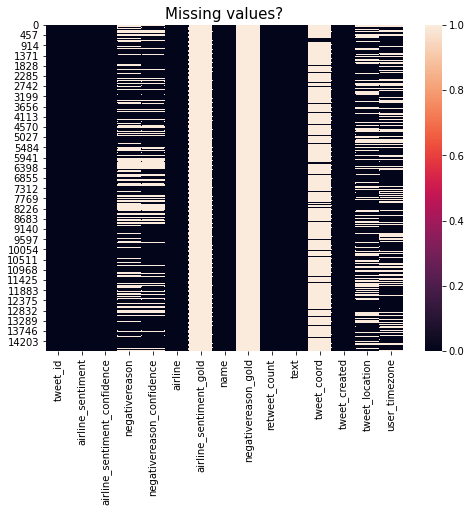

In [14]:
#Visualization of missing value using heatmap

plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  
plt.title("Missing values?", fontsize = 15)
plt.show()

### Data Summary

 * tweet_id
     - Unique tweet ID number, not likely to be useful
 * airline_sentiment
     - Predicted airline sentiment (negative, neutral, and postive)
     - Approx. equal number of postive and neutral tweets
     - About 3x more Negative tweets than neutral tweets
 * airline_sentiment_confidence
     - Average confidence in sentiment score ~90%
     - Min = 0
     - Max = 1
     - Mean = 0.9
     - Median = 1
 * negativereason
     - 9 different/unique reasons for negative sentiments identified - all other lumped into "Can't Tell" bucket
     - Top 3 are Customer Service Issues, Late Flight, Cancelled Flight
 * negativereason_confidence
     - Average confiendence in negative reason above is only ~64%
     - Min = 0
     - Max = 1
     - Mean = 0.64
     - Median = 0.67
 * airline
     - 6 US Airlines identified
     - 2000+ tweets for each company except Virgin America (only ~500 tweets)
 * airline_sentiment_gold
     - Very sparsely populated
     - Seems to be similar information as airline_sentiment column
 * name
     - User name, not likely to be useful
 * negativereason_gold
     - Very sparsely populated
     - Seems to be similar information as negativereason column 
 * retweet_count
     - Number of times tweet was re-tweeted by other twitter users
     - Min = 0
     - Max = 44
     - Mean = ~0
     - Meadian = 0
 * text
     - Actual text of the tweet
 * tweet_coord
     - Coordinate of the tweet 
 * tweet_created
     - Time/Date of the tweet
 * tweet_location
     - City of the tweet
 * user_timezone
     - US Time-zone of tweet/user

## 2. Understand of data columns: (5 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
     
 * Drop unnecessary columns, check shape of the data, print 1st few rows of data.

In [15]:
data.drop(data.columns.difference(['text','airline_sentiment']), 1, inplace=True)

In [16]:
data.shape

(14604, 2)

In [17]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14604 non-null  object
 1   text               14604 non-null  object
dtypes: object(2)
memory usage: 342.3+ KB


In [19]:
data['airline_sentiment'].value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

## 3. Text pre-processing: Data preparation. (16 Marks)
     NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
     
 * Apply all necessary pre-processing step for this task. Print first few rows of data after pre-processing.

In [20]:
# Convert airline_sentiment to numeric
labels = data['airline_sentiment']

labels.loc[labels == 'negative'] = -1
labels.loc[labels == 'neutral'] = 0
labels.loc[labels == 'positive'] = 1

labels = labels.values.ravel()
labels = labels.astype('int64')
labels

array([ 0,  1,  0, ...,  0, -1,  0], dtype=int64)

### a. Html tag removal.

In [21]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data

,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,@VirginAmerica it's really aggressive to blast...
4,-1,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,1,@AmericanAir thank you we got on a different f...
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...
14637,0,@AmericanAir Please bring American Airlines to...
14638,-1,"@AmericanAir you have my money, you change my ..."


#### Contractions (Extra)

In [22]:
# Replace contractions (e.g., can't -> can not)
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

In [23]:
data

,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you have added commercials...
2,0,@VirginAmerica I did not today... Must mean I ...
3,-1,@VirginAmerica it is really aggressive to blas...
4,-1,@VirginAmerica and it is a really big bad thin...
...,...,...
14635,1,@AmericanAir thank you we got on a different f...
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...
14637,0,@AmericanAir Please bring American Airlines to...
14638,-1,"@AmericanAir you have my money, you change my ..."


### b. Tokenization.

In [24]:
def tokenization(text):
    words = nltk.word_tokenize(text)     # list of words.
    return words

data['tokenized_text'] = data['text'].apply(lambda x: tokenization(x))

In [25]:
data

,airline_sentiment,text,tokenized_text
0,0,@VirginAmerica What @dhepburn said.,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,1,@VirginAmerica plus you have added commercials...,"[@, VirginAmerica, plus, you, have, added, com..."
2,0,@VirginAmerica I did not today... Must mean I ...,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,-1,@VirginAmerica it is really aggressive to blas...,"[@, VirginAmerica, it, is, really, aggressive,..."
4,-1,@VirginAmerica and it is a really big bad thin...,"[@, VirginAmerica, and, it, is, a, really, big..."
...,...,...,...
14635,1,@AmericanAir thank you we got on a different f...,"[@, AmericanAir, thank, you, we, got, on, a, d..."
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...,"[@, AmericanAir, leaving, over, 20, minutes, L..."
14637,0,@AmericanAir Please bring American Airlines to...,"[@, AmericanAir, Please, bring, American, Airl..."
14638,-1,"@AmericanAir you have my money, you change my ...","[@, AmericanAir, you, have, my, money, ,, you,..."


### c. Remove the numbers.

In [26]:
def remove_numbers(text):
    sentence_array = []                            # Create empty list to store pre-processed words.
    for word in text:
        new_word = re.sub(r'\d+', '', word)
        if new_word != '':
            sentence_array.append(new_word)                # Append processed words to new list.
    return sentence_array


data['tokenized_text'] = data['tokenized_text'].apply(lambda x: remove_numbers(x))

In [27]:
data

,airline_sentiment,text,tokenized_text
0,0,@VirginAmerica What @dhepburn said.,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,1,@VirginAmerica plus you have added commercials...,"[@, VirginAmerica, plus, you, have, added, com..."
2,0,@VirginAmerica I did not today... Must mean I ...,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,-1,@VirginAmerica it is really aggressive to blas...,"[@, VirginAmerica, it, is, really, aggressive,..."
4,-1,@VirginAmerica and it is a really big bad thin...,"[@, VirginAmerica, and, it, is, a, really, big..."
...,...,...,...
14635,1,@AmericanAir thank you we got on a different f...,"[@, AmericanAir, thank, you, we, got, on, a, d..."
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...,"[@, AmericanAir, leaving, over, minutes, Late,..."
14637,0,@AmericanAir Please bring American Airlines to...,"[@, AmericanAir, Please, bring, American, Airl..."
14638,-1,"@AmericanAir you have my money, you change my ...","[@, AmericanAir, you, have, my, money, ,, you,..."


### d. Removal of Special Characters and Punctuations.

In [28]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_SC_and_P(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    return words
    
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: remove_SC_and_P(x))

In [29]:
data

,airline_sentiment,text,tokenized_text
0,0,@VirginAmerica What @dhepburn said.,"[VirginAmerica, What, dhepburn, said]"
1,1,@VirginAmerica plus you have added commercials...,"[VirginAmerica, plus, you, have, added, commer..."
2,0,@VirginAmerica I did not today... Must mean I ...,"[VirginAmerica, I, did, not, today, Must, mean..."
3,-1,@VirginAmerica it is really aggressive to blas...,"[VirginAmerica, it, is, really, aggressive, to..."
4,-1,@VirginAmerica and it is a really big bad thin...,"[VirginAmerica, and, it, is, a, really, big, b..."
...,...,...,...
14635,1,@AmericanAir thank you we got on a different f...,"[AmericanAir, thank, you, we, got, on, a, diff..."
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...,"[AmericanAir, leaving, over, minutes, Late, Fl..."
14637,0,@AmericanAir Please bring American Airlines to...,"[AmericanAir, Please, bring, American, Airline..."
14638,-1,"@AmericanAir you have my money, you change my ...","[AmericanAir, you, have, my, money, you, chang..."


### e. Removal of stopwords

In [30]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)        # Append processed words to new list.
    return new_words

data['tokenized_text'] = data['tokenized_text'].apply(lambda x: remove_stopwords(x))

In [31]:
data

,airline_sentiment,text,tokenized_text
0,0,@VirginAmerica What @dhepburn said.,"[VirginAmerica, What, dhepburn, said]"
1,1,@VirginAmerica plus you have added commercials...,"[VirginAmerica, plus, added, commercials, expe..."
2,0,@VirginAmerica I did not today... Must mean I ...,"[VirginAmerica, I, today, Must, mean, I, need,..."
3,-1,@VirginAmerica it is really aggressive to blas...,"[VirginAmerica, really, aggressive, blast, obn..."
4,-1,@VirginAmerica and it is a really big bad thin...,"[VirginAmerica, really, big, bad, thing]"
...,...,...,...
14635,1,@AmericanAir thank you we got on a different f...,"[AmericanAir, thank, got, different, flight, C..."
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...,"[AmericanAir, leaving, minutes, Late, Flight, ..."
14637,0,@AmericanAir Please bring American Airlines to...,"[AmericanAir, Please, bring, American, Airline..."
14638,-1,"@AmericanAir you have my money, you change my ...","[AmericanAir, money, change, flight, answer, p..."


### f. Conversion to lowercase.

In [32]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

data['tokenized_text'] = data['tokenized_text'].apply(lambda x: to_lowercase(x))

In [33]:
data

,airline_sentiment,text,tokenized_text
0,0,@VirginAmerica What @dhepburn said.,"[virginamerica, what, dhepburn, said]"
1,1,@VirginAmerica plus you have added commercials...,"[virginamerica, plus, added, commercials, expe..."
2,0,@VirginAmerica I did not today... Must mean I ...,"[virginamerica, i, today, must, mean, i, need,..."
3,-1,@VirginAmerica it is really aggressive to blas...,"[virginamerica, really, aggressive, blast, obn..."
4,-1,@VirginAmerica and it is a really big bad thin...,"[virginamerica, really, big, bad, thing]"
...,...,...,...
14635,1,@AmericanAir thank you we got on a different f...,"[americanair, thank, got, different, flight, c..."
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...,"[americanair, leaving, minutes, late, flight, ..."
14637,0,@AmericanAir Please bring American Airlines to...,"[americanair, please, bring, american, airline..."
14638,-1,"@AmericanAir you have my money, you change my ...","[americanair, money, change, flight, answer, p..."


### g. Lemmatize or stemming.

In [34]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

    
data['tokenized_text_stems'] = data['tokenized_text'].apply(lambda x: stem_words(x))
data['tokenized_text_lemmas'] = data['tokenized_text'].apply(lambda x: lemmatize_verbs(x))

In [35]:
data

,airline_sentiment,text,tokenized_text,tokenized_text_stems,tokenized_text_lemmas
0,0,@VirginAmerica What @dhepburn said.,"[virginamerica, what, dhepburn, said]","[virginameric, what, dhepburn, said]","[virginamerica, what, dhepburn, say]"
1,1,@VirginAmerica plus you have added commercials...,"[virginamerica, plus, added, commercials, expe...","[virginameric, plu, ad, commerc, expery, tacky]","[virginamerica, plus, add, commercials, experi..."
2,0,@VirginAmerica I did not today... Must mean I ...,"[virginamerica, i, today, must, mean, i, need,...","[virginameric, i, today, must, mean, i, nee, t...","[virginamerica, i, today, must, mean, i, need,..."
3,-1,@VirginAmerica it is really aggressive to blas...,"[virginamerica, really, aggressive, blast, obn...","[virginameric, real, aggress, blast, obnoxy, e...","[virginamerica, really, aggressive, blast, obn..."
4,-1,@VirginAmerica and it is a really big bad thin...,"[virginamerica, really, big, bad, thing]","[virginameric, real, big, bad, thing]","[virginamerica, really, big, bad, thing]"
...,...,...,...,...,...
14635,1,@AmericanAir thank you we got on a different f...,"[americanair, thank, got, different, flight, c...","[americanair, thank, got, diff, flight, chicago]","[americanair, thank, get, different, flight, c..."
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...,"[americanair, leaving, minutes, late, flight, ...","[americanair, leav, minut, lat, flight, no, wa...","[americanair, leave, minutes, late, flight, no..."
14637,0,@AmericanAir Please bring American Airlines to...,"[americanair, please, bring, american, airline...","[americanair, pleas, bring, am, airlin, blackb...","[americanair, please, bring, american, airline..."
14638,-1,"@AmericanAir you have my money, you change my ...","[americanair, money, change, flight, answer, p...","[americanair, money, chang, flight, answ, phon...","[americanair, money, change, flight, answer, p..."


### h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)

In [36]:
data['text_stems'] = data['tokenized_text_stems'].apply(lambda x: ' '.join(x))
data['text_lemmas'] = data['tokenized_text_lemmas'].apply(lambda x: ' '.join(x))

data.drop(data.columns.difference(['airline_sentiment','text_stems','text_lemmas']), 1, inplace=True)

### i. Print the first 5 rows of data after pre-processing.

In [37]:
data

,airline_sentiment,text_stems,text_lemmas
0,0,virginameric what dhepburn said,virginamerica what dhepburn say
1,1,virginameric plu ad commerc expery tacky,virginamerica plus add commercials experience ...
2,0,virginameric i today must mean i nee tak anoth...,virginamerica i today must mean i need take an...
3,-1,virginameric real aggress blast obnoxy enterta...,virginamerica really aggressive blast obnoxiou...
4,-1,virginameric real big bad thing,virginamerica really big bad thing
...,...,...,...
14635,1,americanair thank got diff flight chicago,americanair thank get different flight chicago
14636,-1,americanair leav minut lat flight no warn comm...,americanair leave minutes late flight no warn ...
14637,0,americanair pleas bring am airlin blackberry,americanair please bring american airlines bla...
14638,-1,americanair money chang flight answ phon any s...,americanair money change flight answer phone a...


## 4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
    
 * Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

In [38]:
max_features_test = 2000

### CountVectorizer

In [39]:
# Stems Data Text
stems_bow_vec = CountVectorizer(max_features=max_features_test)                # Keep only 2000 features as number of features will increase the processing time.
stems_data_features_cv = stems_bow_vec.fit_transform(data['text_stems'])

stems_data_features_cv = stems_data_features_cv.toarray()                        # Convert the data features to array.

In [40]:
stems_data_features_cv.shape

(14604, 2000)

In [41]:
stems_data_features_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
print(stems_bow_vec.vocabulary_.keys())

dict_keys(['virginameric', 'what', 'said', 'plu', 'ad', 'commerc', 'expery', 'today', 'must', 'mean', 'nee', 'tak', 'anoth', 'trip', 'real', 'blast', 'entertain', 'guest', 'fac', 'littl', 'recours', 'big', 'bad', 'thing', 'sery', 'would', 'pay', 'flight', 'seat', 'play', 'fly', 'va', 'ye', 'near', 'every', 'tim', 'vx', 'ear', 'go', 'away', 'miss', 'opportun', 'without', 'hat', 'https', 'wel', 'now', 'do', 'amaz', 'ar', 'hour', 'good', 'know', 'suicid', 'second', 'lead', 'dea', 'among', 'teen', 'pretty', 'much', 'bet', 'thi', 'gre', 'deal', 'already', 'think', 'nd', 'austral', 'ev', 'gon', 'st', 'yet', 'fab', 'ski', 'stress', 'travel', 'http', 'thank', 'schedule', 'stil', 'mia', 'so', 'excit', 'first', 'cross', 'country', 'lax', 'mco', 'heard', 'noth', 'virgin', 'americ', 'flew', 'nyc', 'sfo', 'last', 'week', 'could', 'ful', 'sit', 'due', 'two', 'larg', 'eith', 'sid', 'help', 'awesom', 'pleas', 'want', 'far', 'may', 'three', 'carry', 'avail', 'select', 'lov', 'you', 'feel', 'brand', 'ma

In [43]:
# Lemmas Data Text
lemmas_bow_vec = CountVectorizer(max_features=max_features_test)                # Keep only 2000 features as number of features will increase the processing time.
lemmas_data_features_cv = lemmas_bow_vec.fit_transform(data['text_lemmas'])

lemmas_data_features_cv = lemmas_data_features_cv.toarray()                        # Convert the data features to array.

In [44]:
lemmas_data_features_cv.shape

(14604, 2000)

In [45]:
lemmas_data_features_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
print(lemmas_bow_vec.vocabulary_.keys())

dict_keys(['virginamerica', 'what', 'say', 'plus', 'add', 'experience', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip', 'really', 'entertainment', 'face', 'little', 'big', 'bad', 'thing', 'seriously', 'would', 'pay', 'flight', 'seat', 'play', 'fly', 'va', 'yes', 'nearly', 'every', 'time', 'vx', 'go', 'away', 'miss', 'opportunity', 'without', 'hat', 'https', 'well', 'now', 'do', 'amaze', 'arrive', 'hour', 'early', 'good', 'know', 'suicide', 'second', 'lead', 'death', 'among', 'teens', 'pretty', 'much', 'better', 'this', 'great', 'deal', 'already', 'think', 'nd', 'australia', 'even', 'st', 'yet', 'fabulous', 'sky', 'stress', 'travel', 'http', 'thank', 'schedule', 'still', 'mia', 'so', 'excite', 'first', 'cross', 'country', 'lax', 'mco', 'hear', 'nothing', 'things', 'virgin', 'america', 'nyc', 'sfo', 'last', 'week', 'could', 'fully', 'sit', 'due', 'two', 'large', 'either', 'side', 'help', 'awesome', 'please', 'want', 'fare', 'may', 'three', 'carriers', 'available', 'select', '

### TFID Vectorizer

In [47]:
# Stems Data Text
stems_vectorizer = TfidfVectorizer(max_features=max_features_test)
stems_data_features_tfid = stems_vectorizer.fit_transform(data['text_stems'])

stems_data_features_tfid = stems_data_features_tfid.toarray()

In [48]:
stems_data_features_tfid.shape

(14604, 2000)

In [49]:
print(stems_vectorizer.vocabulary_.keys())

dict_keys(['virginameric', 'what', 'said', 'plu', 'ad', 'commerc', 'expery', 'today', 'must', 'mean', 'nee', 'tak', 'anoth', 'trip', 'real', 'blast', 'entertain', 'guest', 'fac', 'littl', 'recours', 'big', 'bad', 'thing', 'sery', 'would', 'pay', 'flight', 'seat', 'play', 'fly', 'va', 'ye', 'near', 'every', 'tim', 'vx', 'ear', 'go', 'away', 'miss', 'opportun', 'without', 'hat', 'https', 'wel', 'now', 'do', 'amaz', 'ar', 'hour', 'good', 'know', 'suicid', 'second', 'lead', 'dea', 'among', 'teen', 'pretty', 'much', 'bet', 'thi', 'gre', 'deal', 'already', 'think', 'nd', 'austral', 'ev', 'gon', 'st', 'yet', 'fab', 'ski', 'stress', 'travel', 'http', 'thank', 'schedule', 'stil', 'mia', 'so', 'excit', 'first', 'cross', 'country', 'lax', 'mco', 'heard', 'noth', 'virgin', 'americ', 'flew', 'nyc', 'sfo', 'last', 'week', 'could', 'ful', 'sit', 'due', 'two', 'larg', 'eith', 'sid', 'help', 'awesom', 'pleas', 'want', 'far', 'may', 'three', 'carry', 'avail', 'select', 'lov', 'you', 'feel', 'brand', 'ma

In [50]:
# Lemmas Data Text
lemmas_vectorizer = TfidfVectorizer(max_features=max_features_test)
lemmas_data_features_tfid = lemmas_vectorizer.fit_transform(data['text_lemmas'])

lemmas_data_features_tfid = lemmas_data_features_tfid.toarray()

In [51]:
lemmas_data_features_tfid.shape

(14604, 2000)

In [52]:
print(lemmas_vectorizer.vocabulary_.keys())

dict_keys(['virginamerica', 'what', 'say', 'plus', 'add', 'experience', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip', 'really', 'entertainment', 'face', 'little', 'big', 'bad', 'thing', 'seriously', 'would', 'pay', 'flight', 'seat', 'play', 'fly', 'va', 'yes', 'nearly', 'every', 'time', 'vx', 'go', 'away', 'miss', 'opportunity', 'without', 'hat', 'https', 'well', 'now', 'do', 'amaze', 'arrive', 'hour', 'early', 'good', 'know', 'suicide', 'second', 'lead', 'death', 'among', 'teens', 'pretty', 'much', 'better', 'this', 'great', 'deal', 'already', 'think', 'nd', 'australia', 'even', 'st', 'yet', 'fabulous', 'sky', 'stress', 'travel', 'http', 'thank', 'schedule', 'still', 'mia', 'so', 'excite', 'first', 'cross', 'country', 'lax', 'mco', 'hear', 'nothing', 'things', 'virgin', 'america', 'nyc', 'sfo', 'last', 'week', 'could', 'fully', 'sit', 'due', 'two', 'large', 'either', 'side', 'help', 'awesome', 'please', 'want', 'fare', 'may', 'three', 'carriers', 'available', 'select', '

## 5. Fit and evaluate the model using both types of vectorization. (6+6 Marks)

 * Fit the model using vectorized column
 * Evaluate the model using the confusion matrix

In [53]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[-1, 0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Negative","Actual - Neutral","Actual - Positive"]],
                  columns = [i for i in ["Predicted - Negative","Predicted - Neutral","Predicted - Positive"]])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train, average=None)
    test_recall = metrics.recall_score(y_test,pred_test, average=None)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train, average=None)
    test_precision = metrics.precision_score(y_test,pred_test, average=None)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train, average=None))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test, average=None))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train, average=None))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test, average=None))
    
    return score_list # returning the list with train and test scores

### Stems Text Data - Count Vectorization

In [55]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(stems_data_features_cv, labels, test_size=0.3, random_state=42,stratify=labels)

In [56]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, stems_data_features_cv, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7058335911788698


In [57]:
result =  forest.predict(X_test)                  #saving the prediction on test data as a result

In [58]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(forest)

Accuracy on training set :  0.981706124046175
Accuracy on test set :  0.7366499315381104
Recall on training set :  [0.99578849 0.94960703 0.9690534 ]
Recall on test set :  [0.87154294 0.47737069 0.55240793]
Precision on training set :  [0.98366718 0.97716461 0.9797546 ]
Precision on test set :  [0.79568106 0.55513784 0.67944251]


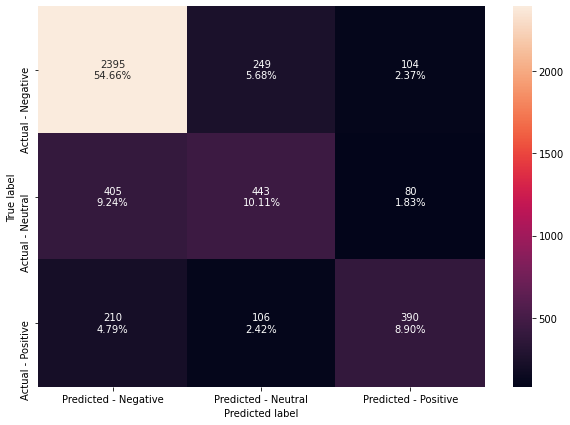

In [59]:
make_confusion_matrix(forest,y_test)

### Stems Text Data - TFID Vectorization

In [60]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(stems_data_features_tfid, labels, test_size=0.3, random_state=42,stratify=labels)

In [61]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, stems_data_features_tfid, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.705490140924306


In [62]:
result =  forest.predict(X_test)                  #saving the prediction on test data as a result

In [63]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(forest)

Accuracy on training set :  0.9743690080219135
Accuracy on test set :  0.7364217252396166
Recall on training set :  [0.99547652 0.92787795 0.9532767 ]
Recall on test set :  [0.91812227 0.39008621 0.48441926]
Precision on training set :  [0.97331097 0.97521866 0.97759801]
Precision on test set :  [0.7682704  0.58670989 0.71101871]


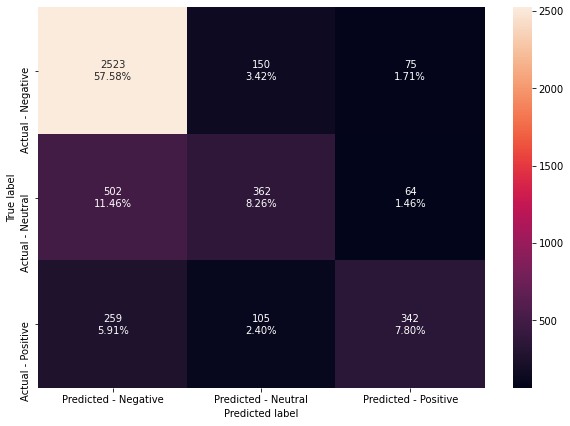

In [64]:
make_confusion_matrix(forest,y_test)

### Lemmas Text Data - Count Vectorization

In [65]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(lemmas_data_features_cv, labels, test_size=0.3, random_state=42,stratify=labels)

In [66]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, lemmas_data_features_cv, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7028201738347726


In [67]:
result =  forest.predict(X_test)                  #saving the prediction on test data as a result

In [68]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(forest)

Accuracy on training set :  0.9801408726276658
Accuracy on test set :  0.7364217252396166
Recall on training set :  [0.99454063 0.9445215  0.97087379]
Recall on test set :  [0.87154294 0.45905172 0.57507082]
Precision on training set :  [0.98288885 0.97751196 0.97264438]
Precision on test set :  [0.80315225 0.54685494 0.65378422]


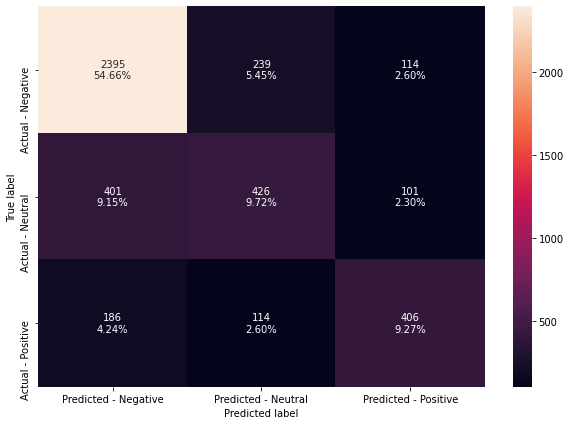

In [69]:
make_confusion_matrix(forest,y_test)

### Lemmas Text Data - TFID Vectorization

In [70]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(lemmas_data_features_tfid, labels, test_size=0.3, random_state=42,stratify=labels)

In [71]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, lemmas_data_features_tfid, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6998733744010951


In [72]:
result =  forest.predict(X_test)                  #saving the prediction on test data as a result

In [73]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(forest)

Accuracy on training set :  0.9776951672862454
Accuracy on test set :  0.7450935645823825
Recall on training set :  [0.99625643 0.93851133 0.95691748]
Recall on test set :  [0.92248908 0.39762931 0.51133144]
Precision on training set :  [0.9775023  0.97737121 0.9788951 ]
Precision on test set :  [0.77428222 0.61092715 0.71626984]


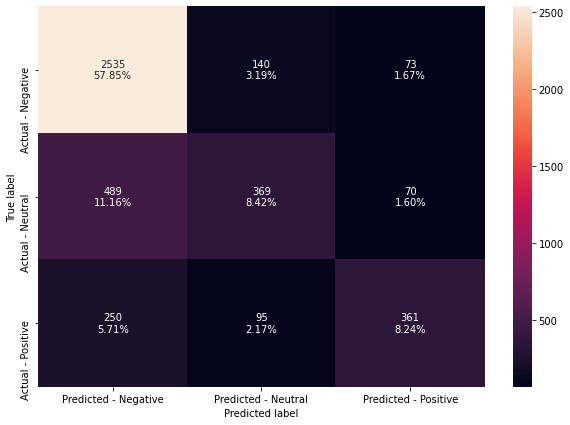

In [74]:
make_confusion_matrix(forest,y_test)

### Choose one model and improve - Lemmas Text Data  & Count Vectorizer

In [75]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(lemmas_data_features_cv, labels, test_size=0.3, random_state=42,stratify=labels)

In [76]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(10, 35)]
base_ln

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [77]:
# K-Fold Cross - validation .
cv_scores = []
for estimator in base_ln:
    clf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

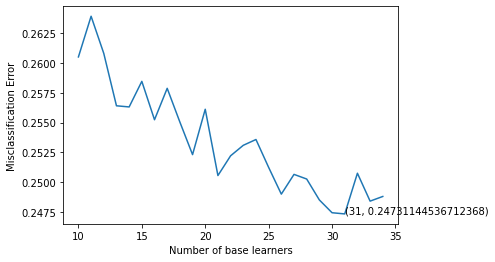

In [78]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [79]:
# From above
# Optimal N_Estimators = 31

forest = RandomForestClassifier(n_estimators=optimal_learners, n_jobs=-1)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, lemmas_data_features_tfid, labels, cv=10)))

RandomForestClassifier(n_estimators=31, n_jobs=-1)
0.7135676914854716


In [80]:
result =  forest.predict(X_test)                  #saving the prediction on test data as a result

In [81]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(forest)

Accuracy on training set :  0.9921737429074545
Accuracy on test set :  0.7494294842537654
Recall on training set :  [0.99688036 0.98104485 0.98847087]
Recall on test set :  [0.88682678 0.45797414 0.59773371]
Precision on training set :  [0.99719145 0.98560149 0.9813253 ]
Precision on test set :  [0.80615283 0.56440903 0.69636964]


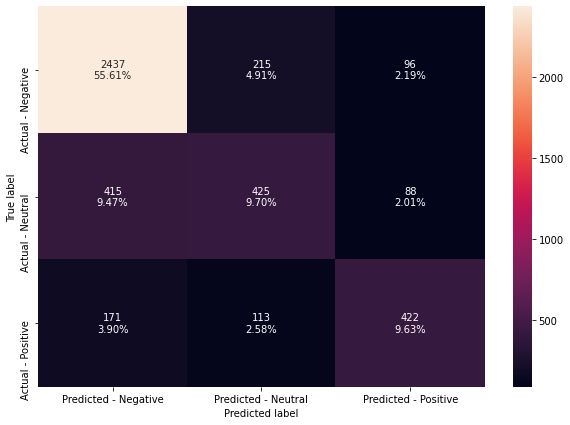

In [82]:
make_confusion_matrix(forest,y_test)

## 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

 * Summary from the understanding of the application of Various Pre-processing, Vectorization and performance of the model on the dataset.

### **Summary**:

- Starting with Twitter feedback from US-based Airline customers as well as the predicted sentiment, we set out to find if a model could be trained to mimic the sentiment analysis provided in the original dataset.
- The text data from the Twitter feedback was processed to remove information unlikely to be useful in the classification, including:
  - HTML tag removal (not useful for this dataset, but done anyway)
  - Numeric, Punctuation, and other Special Character removal
  - Stopword removal
  - Conversion to lowercase
- The text data were also Tokenized and 2 sets of data were created (Lemmatized and Stemmed). Several amounts of key words were used to improve model performance:
  - 1000 (~74% Accuracy on Test Data)
  - 2000 (~75% Accuracy on Test Data) <--------- Selected
  - 3000 (~74.5% Accuracy on Test Data)
  - 4000 (~74.8% Accuracy on Test Data)
- The Lemmatized and Stemmed text data were then vectorized (using CountVecotrization and TFID Vectorization), creating 4 separate datasets to be fed into the training models
- Random Forest Classification was chosen to model the sentiment for each feedback and we attempted to optimize the model based on the number of estimators 
- The overall performance of the final model was good for negative sentiment, but not very good for neutral and positive feedback. There didn't seem to be much improvement by adjusting the size of the key words used to create the classification model, but the number of estimators did have a postive effect. It is likely that a smaller number of estimators should have been used to prevent overfitting. 
- Other classification techniques, model tuning, and hyperparameter turning techniques were not attempted, but could have resulted in a slight improvement in the scoring metrics. However, the biggest limitation may be in the limited size of the dataset.
- Overall the model fit is average (neither good or terribly bad), but perhaps other parameters or pre-processing steps would have helped (e.g., would removing the airlines names from the Twitter feedbacks creating a better fit for all types of sentiments?)